In [2]:
import transformers
import shap
from shap.plots import *
import os

In [3]:
os.environ["TOKENIZERS_PARALLELISM"] = "False"

In [4]:
dl_model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [13]:
dl_model.model.config.architectures

['DistilBertForSequenceClassification']

In [14]:
dl_model(["What a great movie! ...if you have no taste.", "Not a good movie to spend time on."])

[[{'label': 'NEGATIVE', 'score': 0.00014734955038875341},
  {'label': 'POSITIVE', 'score': 0.9998526573181152}],
 [{'label': 'NEGATIVE', 'score': 0.9997993111610413},
  {'label': 'POSITIVE', 'score': 0.00020068224694114178}]]

In [15]:
explainer = shap.Explainer(dl_model) 
shap_values = explainer(["What a great movie! ...if you have no taste.", "Not a good movie to spend time on."])

In [16]:
shap_values

.values =
array([array([[-9.67730557e-07,  9.69856046e-07],
              [ 4.31010722e-02, -4.31010701e-02],
              [-1.20852573e-01,  1.20852580e-01],
              [-7.40122087e-01,  7.40122085e-01],
              [-9.51387001e-03,  9.51387361e-03],
              [ 4.70549364e-02, -4.70549273e-02],
              [ 9.70632726e-03, -9.70631822e-03],
              [ 2.61529326e-02, -2.61529319e-02],
              [ 2.60607838e-02, -2.60607664e-02],
              [ 7.68496945e-02, -7.68496880e-02],
              [-6.26485123e-02,  6.26485130e-02],
              [ 4.05020140e-03, -4.05020171e-03],
              [ 1.47160936e-01, -1.47160936e-01],
              [-5.97239103e-02,  5.97239076e-02],
              [ 2.92012157e-02, -2.92012075e-02],
              [-3.99875717e-07,  4.04027690e-07]]),
       array([[-1.06965672e-08, -3.34694050e-10],
              [ 7.93022308e-01, -7.93022314e-01],
              [-7.11299120e-03,  7.11297376e-03],
              [-1.74711328e-01,  1.747

In [25]:
shap_values[0, :, "POSITIVE"]

.values =
array([ 9.69856046e-07, -4.31010701e-02,  1.20852580e-01,  7.40122085e-01,
        9.51387361e-03, -4.70549273e-02, -9.70631822e-03, -2.61529319e-02,
       -2.60607664e-02, -7.68496880e-02,  6.26485130e-02, -4.05020171e-03,
       -1.47160936e-01,  5.97239076e-02, -2.92012075e-02,  4.04027690e-07])

.base_values =
0.4163283705711365

.data =
array(['', 'What ', 'a ', 'great ', 'movie', '! ', '.', '.', '.', 'if ',
       'you ', 'have ', 'no ', 'taste', '.', ''], dtype='<U6')

In [17]:
shap.plots.text(shap_values[0, :, "POSITIVE"])

In [26]:
shap.plots.text(shap_values[1, :, "NEGATIVE"])

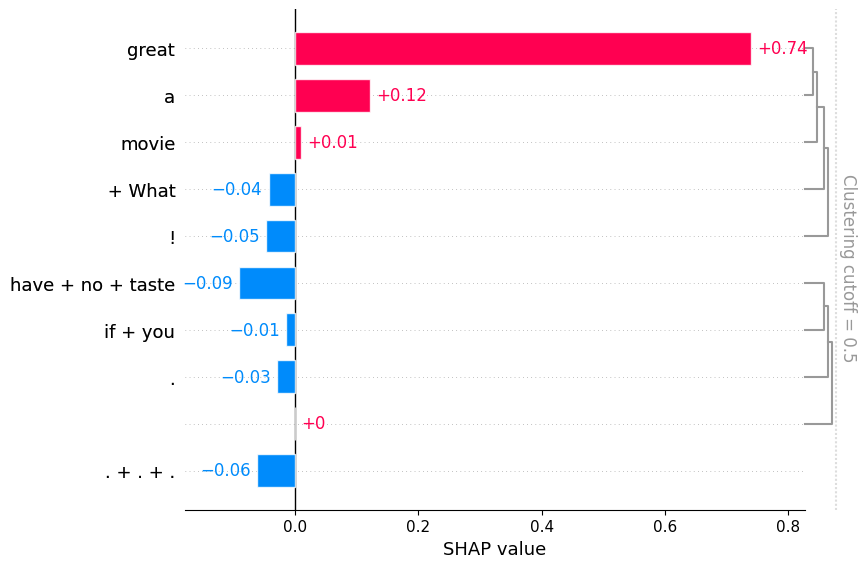

In [27]:
bar(shap_values[0, :,'POSITIVE'])

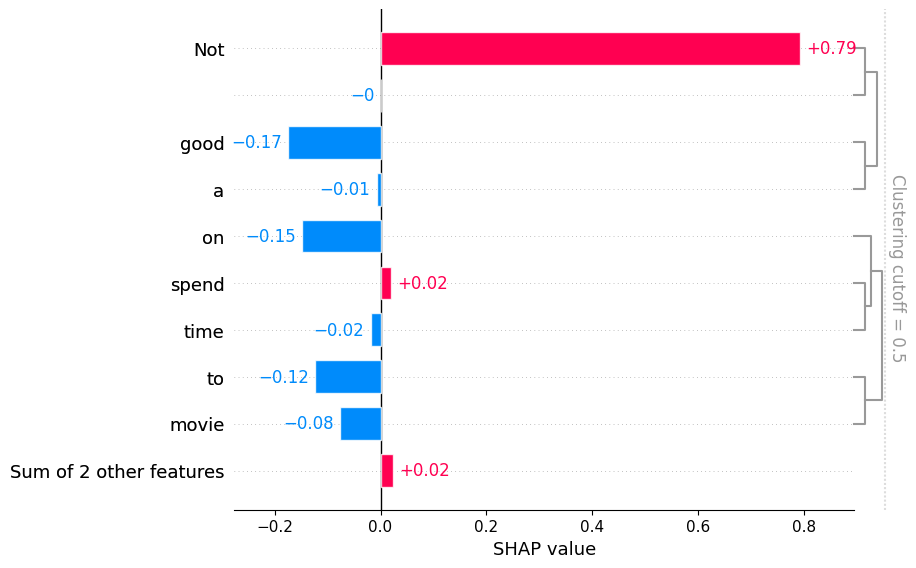

In [28]:
bar(shap_values[1, :,'NEGATIVE'])